## 1. Import data and libraries

In [1]:
#import libraries 
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium 

In [77]:
# Import ".json" file for the U.S. 

country_geo = '/Users/wenboyang/Desktop/Data Analytics/USA Gun Violence Project/us-states JSON.json'

In [5]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/'

In [6]:
#import wrangled gun violence data 
df = pd.read_csv(os.path.join(path,'recipes.csv'))

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

## 2. Data Wrangling

### Fix dummy columns

In [13]:
# Select only the necessary columns and put them in a list called columns

columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin",
"title",
"rating",
"calories",
"protein",
"fat",
"sodium"
]

In [15]:
#create new df with selected columns
df_subset=df[columns]

In [16]:
df_subset.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,illinois,indiana,iowa,kansas,kentucky,louisiana,maine,maryland,massachusetts,michigan,minnesota,mississippi,missouri,nebraska,new hampshire,new jersey,new mexico,new york,north carolina,ohio,oklahoma,oregon,pennsylvania,rhode island,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,title,rating,calories,protein,fat,sodium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0


In [17]:
# Select only the states from state_rec in a new subset

states_num = df_subset[["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"]]

In [18]:
states_num.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,illinois,indiana,iowa,kansas,kentucky,louisiana,maine,maryland,massachusetts,michigan,minnesota,mississippi,missouri,nebraska,new hampshire,new jersey,new mexico,new york,north carolina,ohio,oklahoma,oregon,pennsylvania,rhode island,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas Series data structure

s2 = states_num.idxmax(axis=1)

In [21]:
s2

0           alabama
1           alabama
2          new york
3           alabama
4        california
            ...    
20047       alabama
20048       alabama
20049       alabama
20050       alabama
20051       alabama
Length: 20052, dtype: object

In [22]:
# Create new column 'state' in the df_subset dataframe

df_subset['STATE_NAME'] = s2

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50839/465389132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['STATE_NAME'] = s2


In [23]:
df_subset.head()

,alabama,alaska,arizona,california,colorado,connecticut,florida,georgia,hawaii,idaho,illinois,indiana,iowa,kansas,kentucky,louisiana,maine,maryland,massachusetts,michigan,minnesota,mississippi,missouri,nebraska,new hampshire,new jersey,new mexico,new york,north carolina,ohio,oklahoma,oregon,pennsylvania,rhode island,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,title,rating,calories,protein,fat,sodium,STATE_NAME
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california


In [24]:
# Drop the dummy columns from the dataframe

df_subset.drop(columns = ["alabama",
"alaska",
"arizona",
"california",
"colorado",
"connecticut",
"florida",
"georgia",
"hawaii",
"idaho",
"illinois",
"indiana",
"iowa",
"kansas",
"kentucky",
"louisiana",
"maine",
"maryland",
"massachusetts",
"michigan",
"minnesota",
"mississippi",
"missouri",
"nebraska",
"new hampshire",
"new jersey",
"new mexico",
"new york",
"north carolina",
"ohio",
"oklahoma",
"oregon",
"pennsylvania",
"rhode island",
"south carolina",
"tennessee",
"texas",
"utah",
"vermont",
"virginia",
"washington",
"west virginia",
"wisconsin"], inplace = True)

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50839/530819815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.drop(columns = ["alabama",


In [26]:
df_subset

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,new york
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,california
...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,alabama
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,alabama
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,alabama
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,alabama


In [30]:
#convert state name to title 
df_subset['STATE_NAME'] = df_subset['STATE_NAME'].str.title()

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50839/1845613143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['STATE_NAME'] = df_subset['STATE_NAME'].str.title()


In [31]:
df_subset.head()

,title,rating,calories,protein,fat,sodium,STATE_NAME
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,Alabama
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,Alabama
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,New York
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,Alabama
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,California


## 3. Data consistency checks 

In [32]:
# Check for missing values
df_subset.isnull().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
STATE_NAME       0
dtype: int64

In [33]:
# Impute missing values with median
df_subset['calories'].fillna(df_subset['calories'].median(), inplace=True)
df_subset['protein'].fillna(df_subset['protein'].median(), inplace=True)
df_subset['fat'].fillna(df_subset['fat'].median(), inplace=True)
df_subset['sodium'].fillna(df_subset['sodium'].median(), inplace=True)

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50839/1493005099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['calories'].fillna(df_subset['calories'].median(), inplace=True)
/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50839/1493005099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['protein'].fillna(df_subset['protein'].median(), inplace=True)
/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_50839/1493005099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [34]:
# Check for missing values again 
df_subset.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
sodium        0
STATE_NAME    0
dtype: int64

In [35]:
#check for duplicates 
dups = df_subset.duplicated()

In [38]:
dups.shape

(20052,)

No duplicates 

### Check extreme values 

In [49]:
#check calories for extreme values with histogram 

# Create a 'cal_per_portion' column
df_subset['cal_per_portion'] = df_subset['calories']*4

<Axes: xlabel='cal_per_portion', ylabel='Count'>

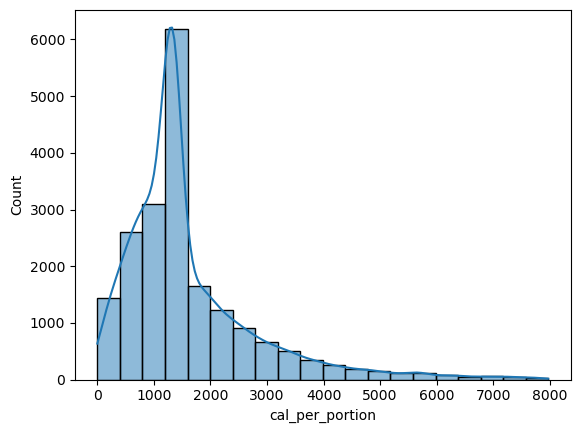

In [50]:
sns.histplot(df_subset['cal_per_portion'], bins=20, kde = True)  # shows extreme values for 'cal_per_portion'

In [46]:
# Clean extreme values in 'cal_per_portion'
df_subset = df_subset[df_subset['cal_per_portion'] < 8000]

<Axes: xlabel='protein', ylabel='Count'>

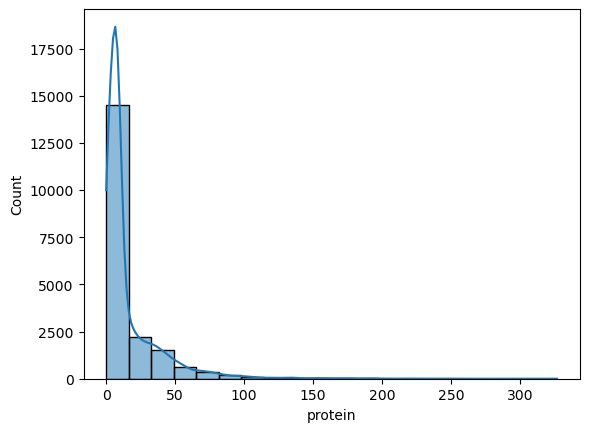

In [48]:
#Create histogram for protein 
sns.histplot(df_subset['protein'], bins=20, kde = True) 

<Axes: xlabel='fat', ylabel='Count'>

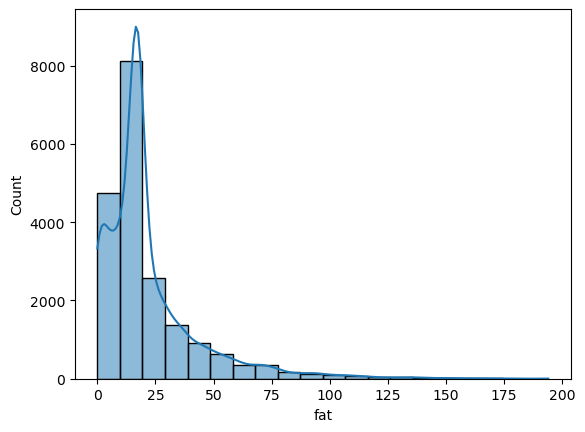

In [51]:
#Check fat for extreme values with histogram 
sns.histplot(df_subset['fat'], bins=20, kde = True) 

In [52]:
# Check how many extreme values
df_subset[df_subset['fat'] >1000]

,title,rating,calories,protein,fat,sodium,STATE_NAME,cal_per_portion


<Axes: xlabel='sodium', ylabel='Count'>

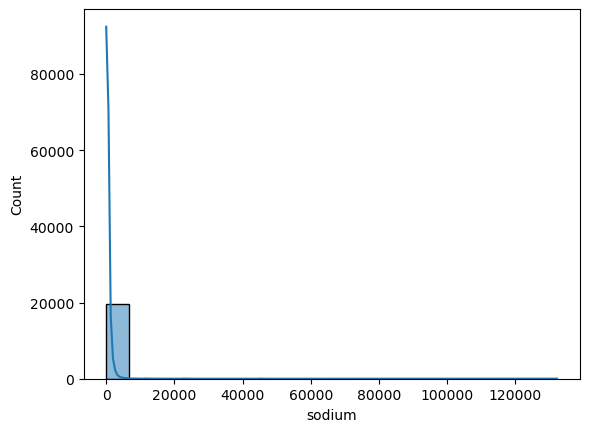

In [53]:
#Check sodium for extreme values with histogram 
sns.histplot(df_subset['sodium'], bins=20, kde = True) 

<Axes: xlabel='rating', ylabel='Count'>

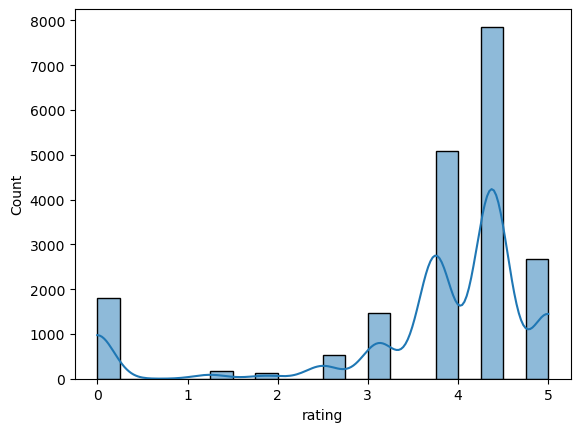

In [55]:
#check rating variable for values of zero 
sns.histplot(df_subset['rating'], bins=20, kde = True)

In [56]:
#remove values of zero 

df_subset = df_subset[df_subset['rating'] >= 1]

In [59]:
df_subset.dtypes

title               object
rating             float64
calories           float64
protein            float64
fat                float64
sodium             float64
STATE_NAME          object
cal_per_portion    float64
dtype: object

## 4. Plot a chloropleth

In [63]:
#select only state name and rating to plot 
data_to_plot = df_subset[['STATE_NAME','rating']]

In [78]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATE_NAME', 'rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)

map